# Notebook FOEM Week 5

### Notebook 1 (Basics)

In [96]:
# Für Zeitreihenoperationen 
import pandas as pd
import numpy as np

# Zum Plotten
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Für Autokorrelation
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Für Stationarität
from statsmodels.tsa.stattools import adfuller

# Für Komponentenzerlegung
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

# Für die Vorhersagen
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Autocorrelation

In [97]:
ene = pd.read_csv("germany_fossil_renew.csv", sep=";")

In [98]:
ene.head()

,Datum,Fossile,Wind,Solar
0,01/2016,37521,9771,702
1,02/2016,32023,10371,1350
2,03/2016,35256,6331,2591
3,04/2016,30078,6235,4129
4,05/2016,27404,6445,5190


In [99]:
ene['Datum'] = pd.to_datetime(ene['Datum'])
ene['Datum'].freq = 'M'

c:\temp\ipykernel_6988\44993407.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [100]:
ene['Datum'] = pd.to_datetime(ene['Datum'], format='%Y-%m-%d')

In [101]:
ene.set_index('Datum', inplace=True)
ene.head()

,Fossile,Wind,Solar
Datum,,,
2016-01-01,37521,9771,702
2016-02-01,32023,10371,1350
2016-03-01,35256,6331,2591
2016-04-01,30078,6235,4129
2016-05-01,27404,6445,5190


C:\Users\hubersi\.conda\envs\foem24\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



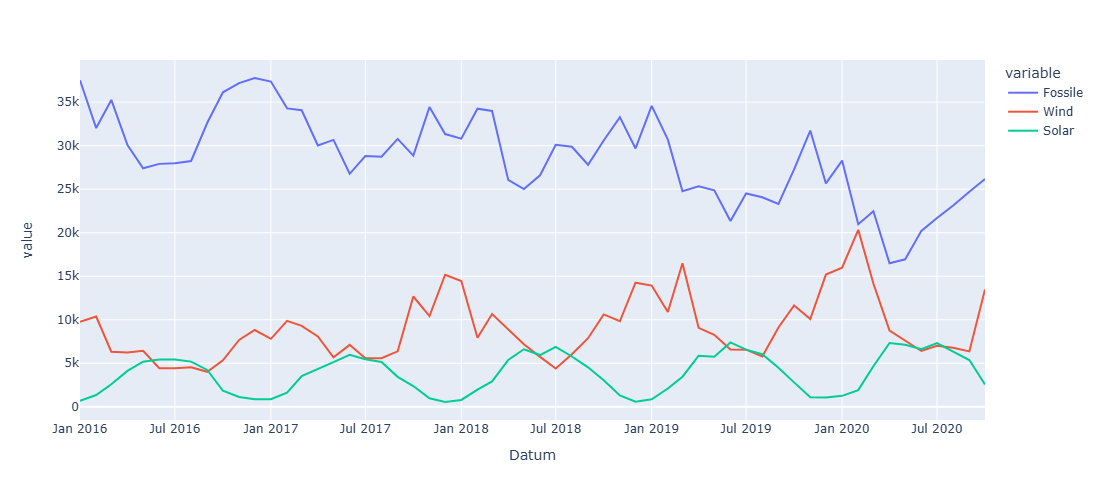

In [102]:
px.line(ene, x=ene.index, y=['Fossile','Wind','Solar'], width=900, height=500)

C:\Users\hubersi\.conda\envs\foem24\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



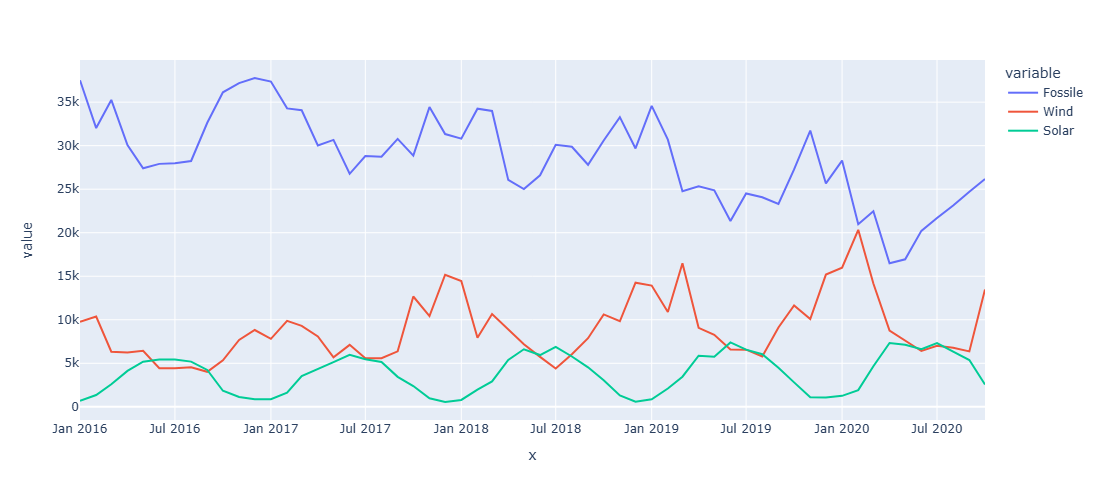

In [103]:
fig = px.line(ene, x=np.array(ene.index), y=['Fossile', 'Wind', 'Solar'], width=900, height=500)
fig.show()

In [104]:
solar = ene.drop(['Fossile','Wind'], axis = 1)
solar.head(12)

,Solar
Datum,
2016-01-01,702
2016-02-01,1350
2016-03-01,2591
2016-04-01,4129
2016-05-01,5190
2016-06-01,5436
2016-07-01,5436
2016-08-01,5191
2016-09-01,4233


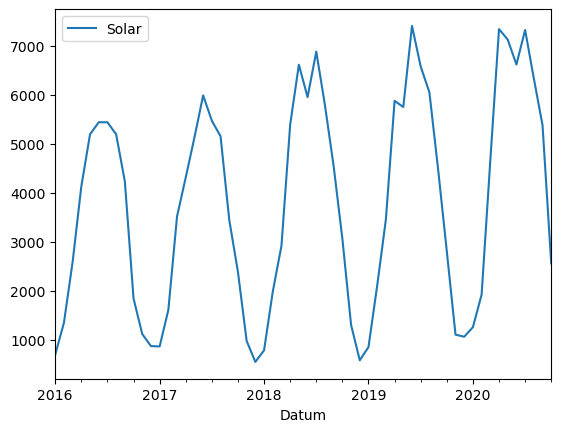

In [105]:
solar.plot();

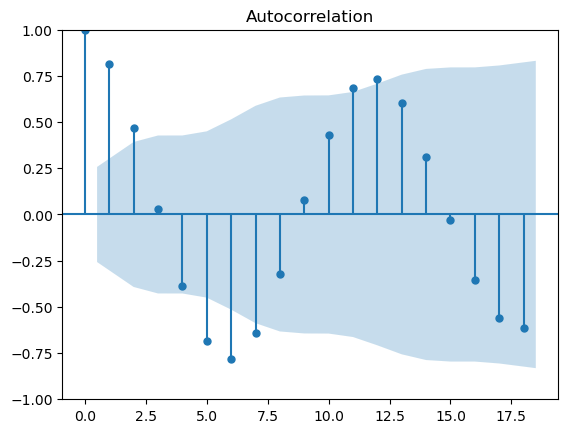

In [106]:
ACF = plot_acf(solar)

In [107]:
solar_lags = solar.copy()
lags = 12

for lag in range(12, lags+1):
    column_name = f"lag_{lag}"
    solar_lags[column_name] = solar_lags["Solar"].shift(lag)

solar_lags

,Solar,lag_12
Datum,,
2016-01-01,702,NaN
2016-02-01,1350,NaN
2016-03-01,2591,NaN
2016-04-01,4129,NaN
2016-05-01,5190,NaN
2016-06-01,5436,NaN
2016-07-01,5436,NaN
2016-08-01,5191,NaN
2016-09-01,4233,NaN


#### Was ist der Unterschied / die Interpretation von ACF vs. PACF?

Autokorrelationsfunktion zu Lag 6<br>
$y = a_6 * x_6$<br>
Bestimme Gewicht $a_6$<br>

Partielle Autokorrelationsfunktion zu Lag 6<br>
$y = a_1 * x_1 + a_2 * x_2 + ... + a_6 * x_6$<br>
Bestimme Gewicht $a_6$<br>

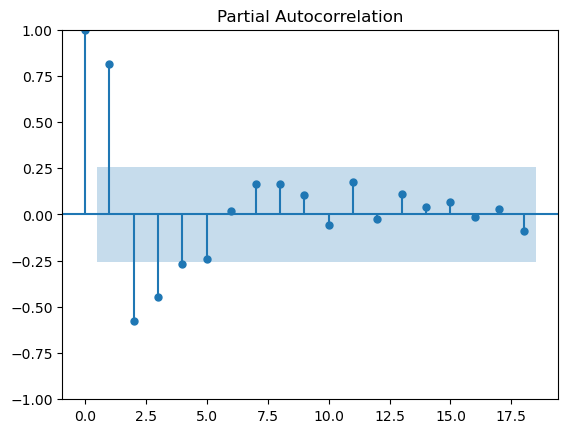

In [108]:
ACF = plot_pacf(solar)

## Stationarity

In [109]:
# Utility function for ADF test
def adf_test(series, title=''):
    print(f'--- ADF Test: {title} ---')
    result = adfuller(series.dropna())
    adf_stat = result[0]
    p_value = result[1]
    print(f'ADF Statistic: {adf_stat:.4f}')
    print(f'p-value: {p_value:.4f}')
    
    if p_value < 0.05:
        print("✅ Result: The series is likely stationary (reject H0).")
    else:
        print("⚠️ Result: The series is likely non-stationary (fail to reject H0).")
    
    print('-------------------------\n')

### Time Series Data

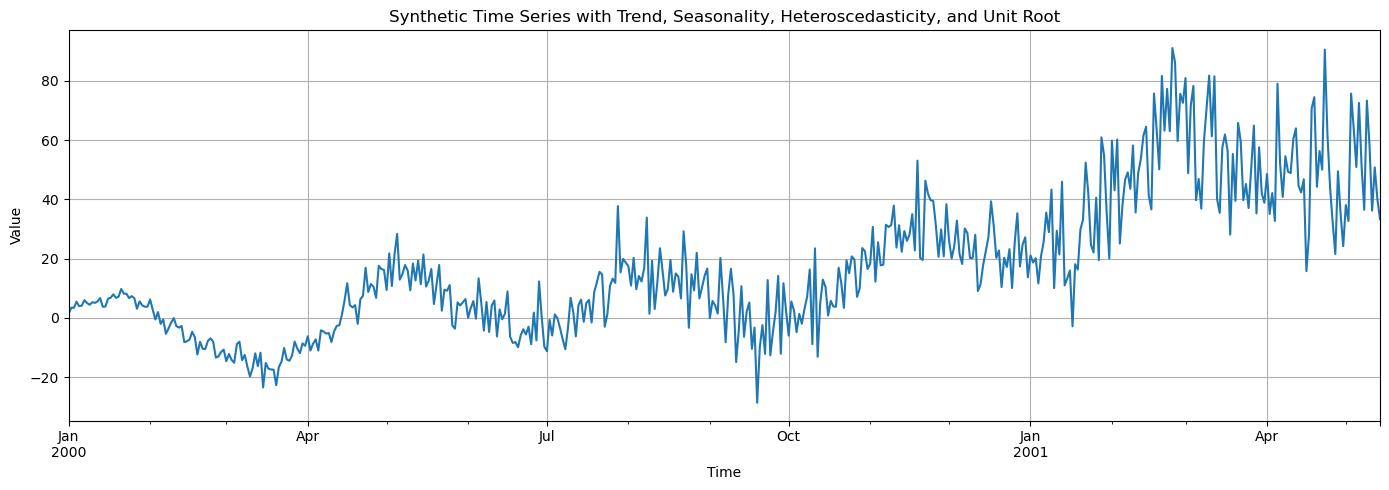

In [110]:
np.random.seed(42)

# Time axis
n = 500
time = np.arange(n)

# Linear trend
trend = 0.08 * time

# Seasonality (e.g., sinusoidal with a yearly pattern)
seasonality = 10 * np.sin(1 * np.pi * time / 50)

# Heteroscedastic noise: increasing standard deviation
noise_std = 0.8 + 0.03 * time
noise = noise_std * np.random.randn(n)

# Random walk component (introducing unit root)
random_walk = np.cumsum(np.random.normal(loc=0, scale=1, size=n))

# Combine components
y = trend + seasonality + noise + random_walk

# Create a DataFrame
ts = pd.Series(y, index=pd.date_range(start='2000-01-01', periods=n, freq='D'))

# Plot
plt.figure(figsize=(14, 5))
ts.plot(title='Synthetic Time Series with Trend, Seasonality, Heteroscedasticity, and Unit Root')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

### Components:

In [111]:
# Perform seasonal decomposition
# Set period to match the seasonality (100 in this case)
decomposition = seasonal_decompose(ts, model='additive', period=100)

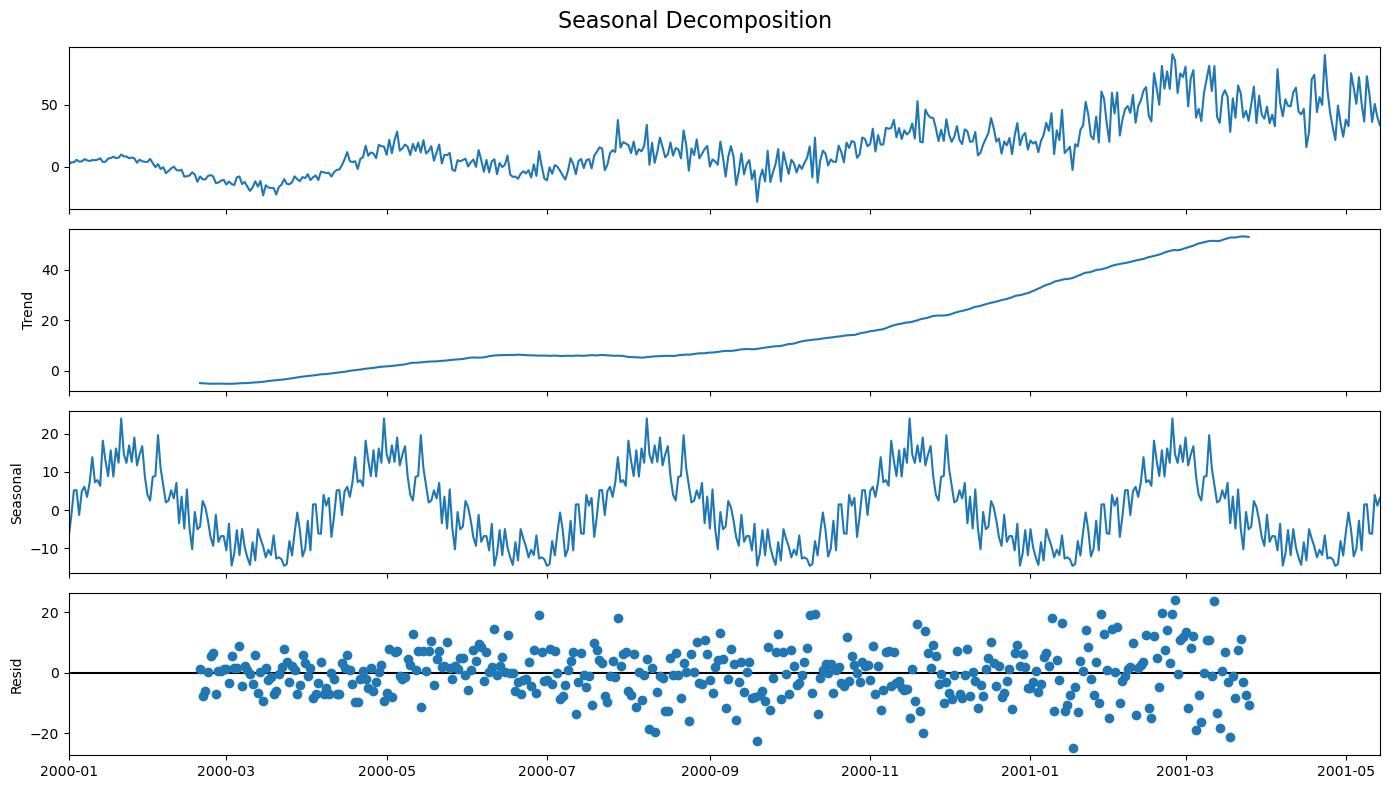

In [112]:
# Plot the decomposition
fig = decomposition.plot()
fig.set_size_inches(14, 8)
plt.suptitle("Seasonal Decomposition", fontsize=16)
plt.tight_layout()
plt.show()

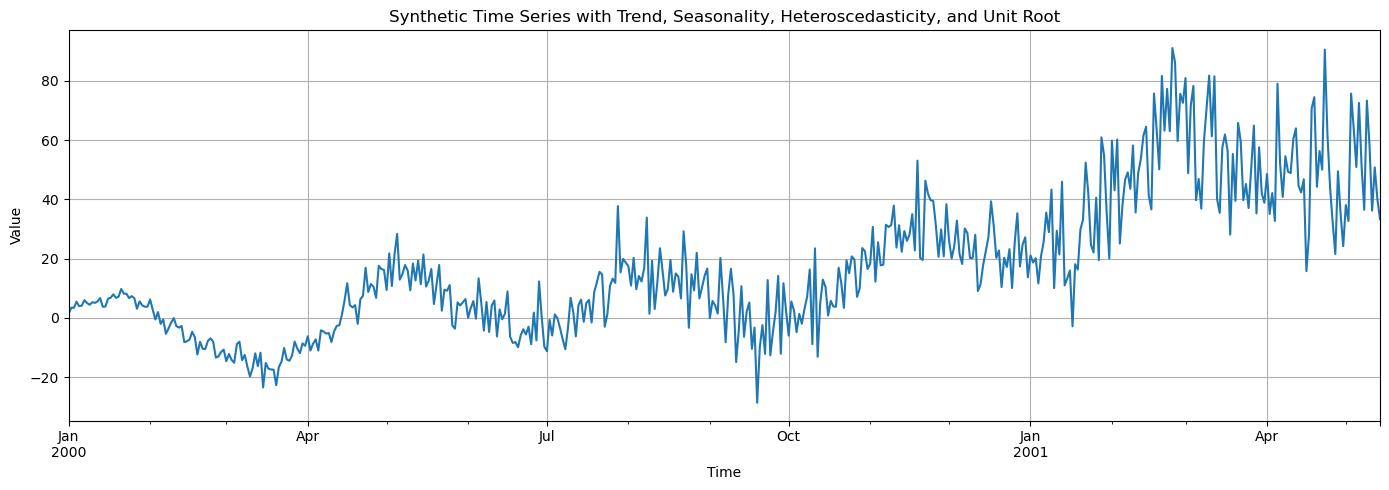

In [113]:
plt.figure(figsize=(14, 5))
ts.plot(title='Synthetic Time Series with Trend, Seasonality, Heteroscedasticity, and Unit Root')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True)
plt.tight_layout()
plt.show()

### Differencing

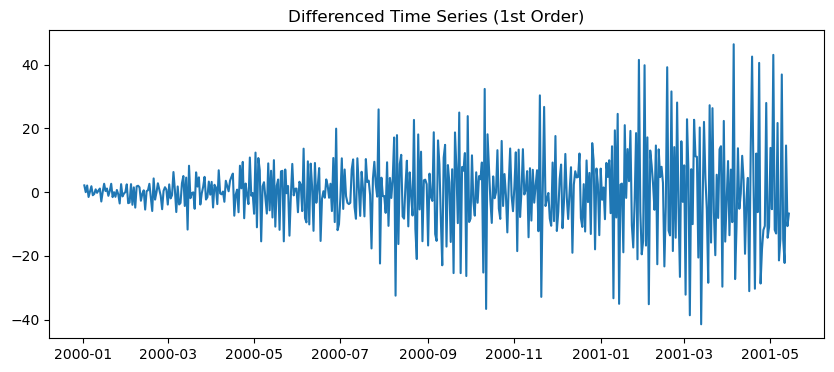

--- ADF Test: 1st Order Differencing ---
ADF Statistic: -10.7226
p-value: 0.0000
✅ Result: The series is likely stationary (reject H0).
-------------------------



In [114]:
ts_diff = ts.diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(ts_diff)
plt.title('Differenced Time Series (1st Order)')
plt.show()

adf_test(ts_diff, title='1st Order Differencing')

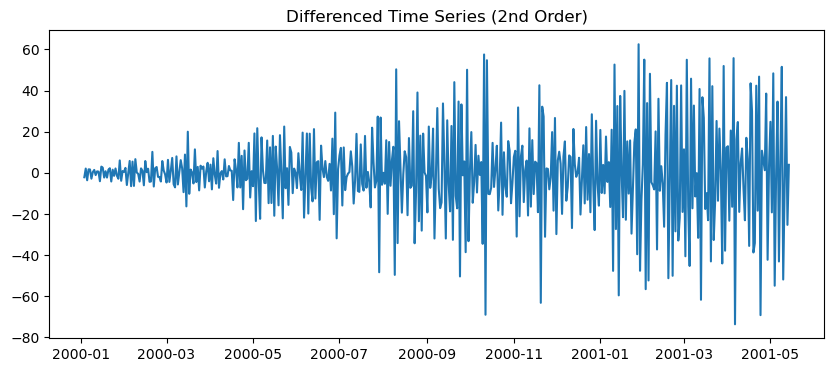

--- ADF Test: 2nd Order Differencing ---
ADF Statistic: -11.6891
p-value: 0.0000
✅ Result: The series is likely stationary (reject H0).
-------------------------



In [115]:
ts_diff2 = ts.diff().diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(ts_diff2)
plt.title('Differenced Time Series (2nd Order)')
plt.show()

adf_test(ts_diff2, title='2nd Order Differencing')

### Log Transformation

C:\Users\hubersi\.conda\envs\foem24\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning:

invalid value encountered in log



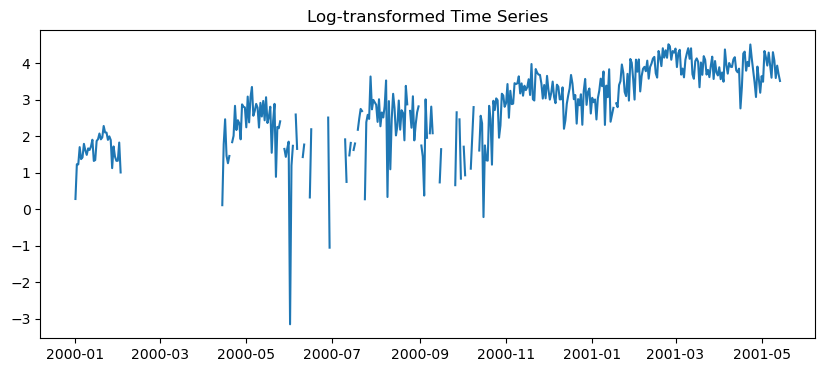

--- ADF Test: Log Transformation ---
ADF Statistic: -1.8352
p-value: 0.3631
⚠️ Result: The series is likely non-stationary (fail to reject H0).
-------------------------



In [116]:
ts_log = np.log(ts)

plt.figure(figsize=(10,4))
plt.plot(ts_log)
plt.title('Log-transformed Time Series')
plt.show()

adf_test(ts_log, title='Log Transformation')

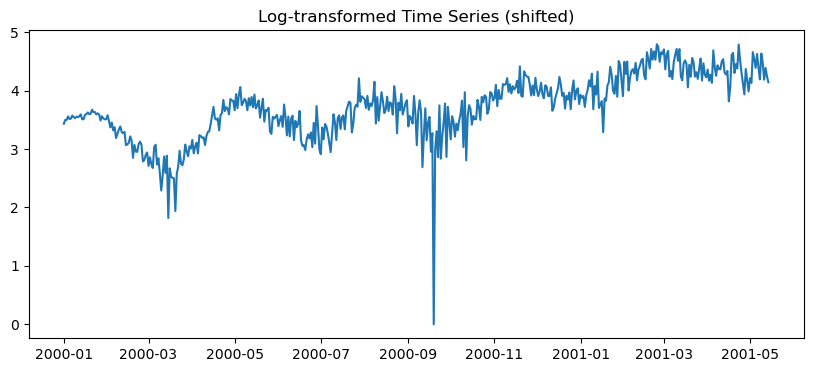

In [117]:
# Shift the series to make all values positive before log transform
shift_value = abs(ts.min()) + 1  # So that the smallest value becomes 1
ts_shifted = ts + shift_value

# Apply log transform
ts_log = np.log(ts_shifted)

# Plot
plt.figure(figsize=(10,4))
plt.plot(ts_log)
plt.title('Log-transformed Time Series (shifted)')
plt.show()

### Detrending (Subtracting a Linear Trend)

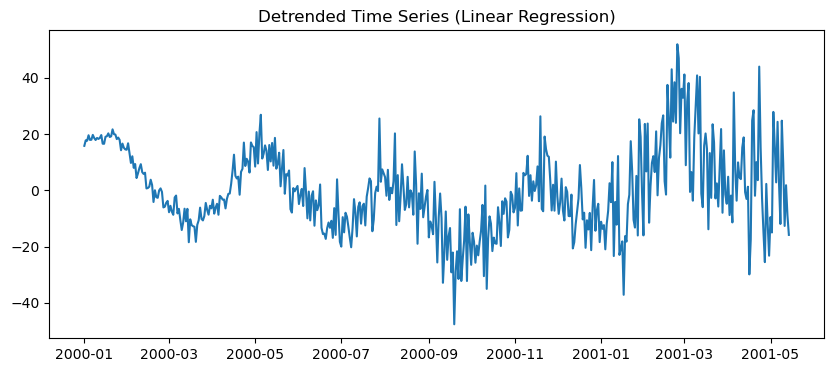

--- ADF Test: Detrended ---
ADF Statistic: -3.1413
p-value: 0.0236
✅ Result: The series is likely stationary (reject H0).
-------------------------



In [118]:
X = np.arange(len(ts)).reshape(-1, 1)
y = ts.values

lr = LinearRegression().fit(X, y)
trend = lr.predict(X)

ts_detrended = ts - trend

plt.figure(figsize=(10,4))
plt.plot(ts_detrended)
plt.title('Detrended Time Series (Linear Regression)')
plt.show()

adf_test(ts_detrended, title='Detrended')

### Seasonal Adjustment

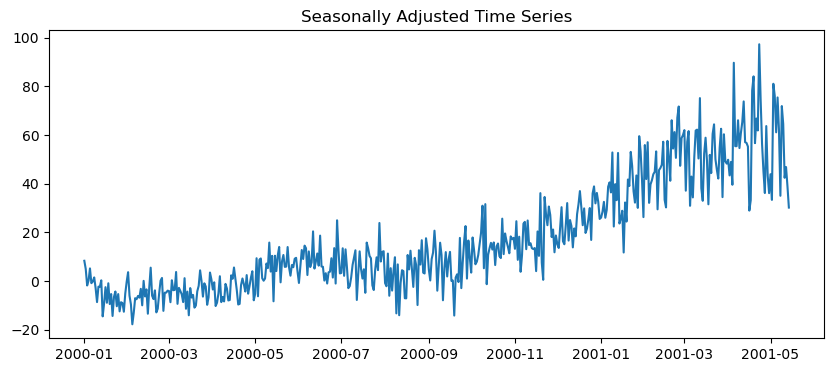

--- ADF Test: Seasonally Adjusted ---
ADF Statistic: 0.1830
p-value: 0.9713
⚠️ Result: The series is likely non-stationary (fail to reject H0).
-------------------------



In [119]:
decomp = seasonal_decompose(ts, model='additive', period=100)  # Adjust `period` as needed
ts_deseasonalized = ts - decomp.seasonal

plt.figure(figsize=(10,4))
plt.plot(ts_deseasonalized)
plt.title('Seasonally Adjusted Time Series')
plt.show()

adf_test(ts_deseasonalized, title='Seasonally Adjusted')

## Forecasting

### Basics and naive approach

In [135]:
train_data = ene['Solar'].iloc[:-12]  
one_step = ene['Solar'].iloc[-12:-11]
test_data = ene['Solar'].iloc[-12:]

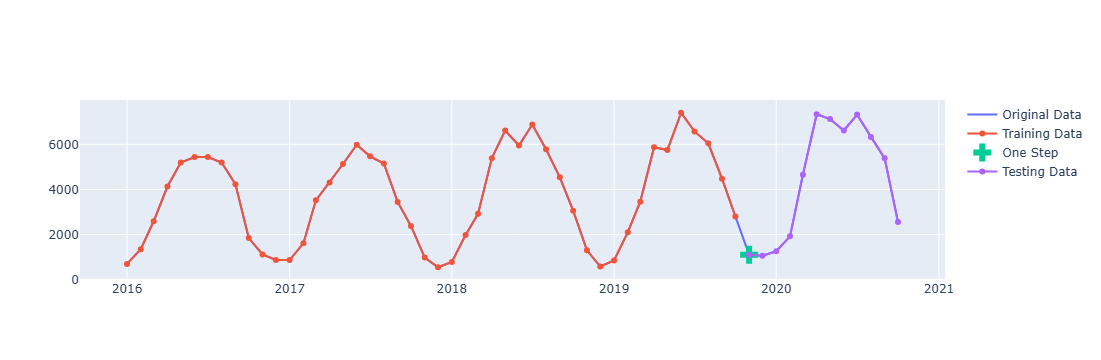

In [136]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ene.index, y=ene['Solar'], name='Original Data'))
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines+markers', name='Training Data'))
fig.add_trace(go.Scatter(x=one_step.index, y=one_step, mode='markers', marker=dict(symbol='cross', size=15), name='One Step'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines+markers', name='Testing Data'))
fig.show()

#### One-step prediction

In [137]:
train_data.tail()

Datum
2019-06-01    7399
2019-07-01    6572
2019-08-01    6045
2019-09-01    4480
2019-10-01    2807
Freq: MS, Name: Solar, dtype: int64

In [138]:
naive_one_step_forecast = pd.Series(train_data.iloc[-1], index=one_step.index)

In [139]:
naive_one_step_forecast

Datum
2019-11-01    2807
Freq: MS, dtype: int64

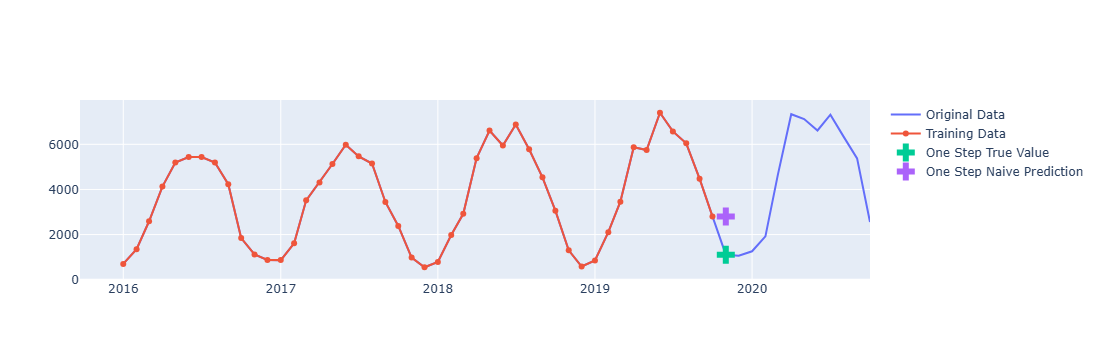

In [140]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=ene.index, y=ene['Solar'], name='Original Data'))
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines+markers', name='Training Data'))
fig.add_trace(go.Scatter(x=one_step.index, y=one_step, mode='markers', marker=dict(symbol='cross', size=15), name='One Step True Value'))
fig.add_trace(go.Scatter(x=one_step.index, y=naive_one_step_forecast, mode='markers', marker=dict(symbol='cross', size=15), name='One Step Naive Prediction'))
fig.show()

In [141]:
mse = mean_squared_error(one_step, naive_one_step_forecast)
mae = mean_absolute_error(one_step, naive_one_step_forecast)
print('Test MSE: ', mse, "Test MAE: ", mae)

Test MSE:  2883204.0 Test MAE:  1698.0


#### Naive one-step prediction for expanding window

In [142]:
cont_naive_one_step_forecast = pd.Series(ene['Solar'].shift(periods=1, fill_value = 112), index=test_data.index)
cont_naive_one_step_forecast

Datum
2019-11-01    2807
2019-12-01    1109
2020-01-01    1066
2020-02-01    1261
2020-03-01    1923
2020-04-01    4657
2020-05-01    7335
2020-06-01    7121
2020-07-01    6613
2020-08-01    7316
2020-09-01    6330
2020-10-01    5378
Freq: MS, Name: Solar, dtype: int64

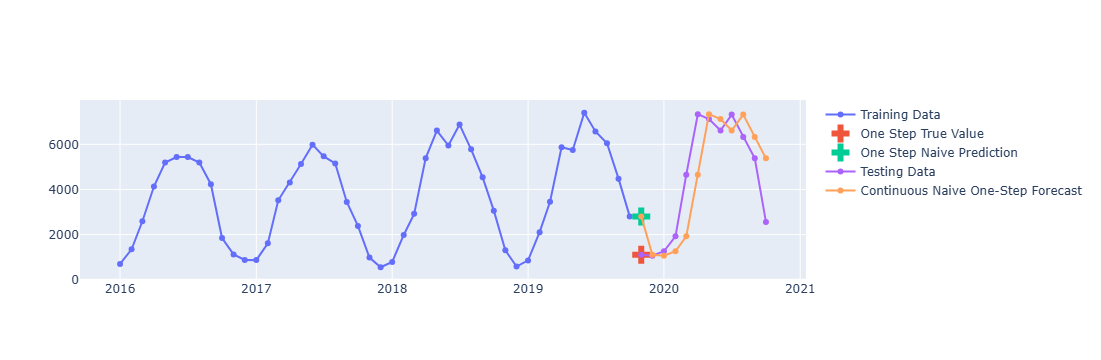

In [143]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines+markers', name='Training Data'))
fig.add_trace(go.Scatter(x=one_step.index, y=one_step, mode='markers', marker=dict(symbol='cross', size=15), name='One Step True Value'))
fig.add_trace(go.Scatter(x=one_step.index, y=naive_one_step_forecast, mode='markers', marker=dict(symbol='cross', size=15), name='One Step Naive Prediction'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines+markers', name='Testing Data'))
fig.add_trace(go.Scatter(x=test_data.index, y=cont_naive_one_step_forecast, mode='lines+markers', name='Continuous Naive One-Step Forecast'))
fig.show()

c:\temp\ipykernel_6988\2435961639.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\temp\ipykernel_6988\2435961639.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



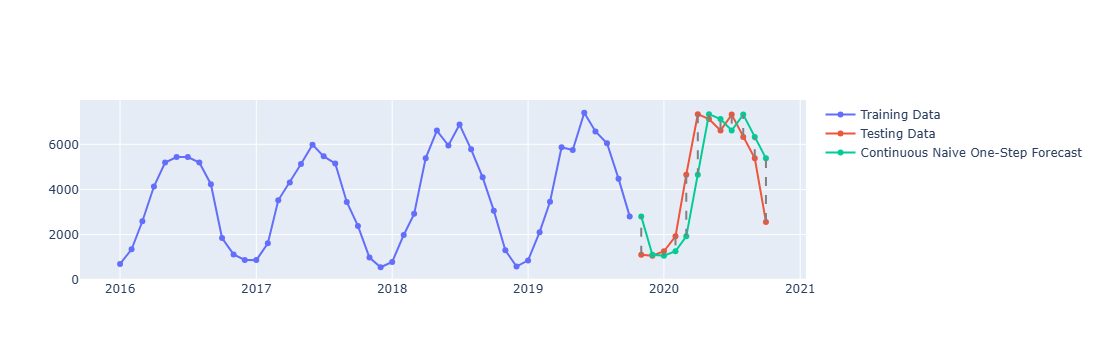

In [144]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines+markers', name='Training Data'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines+markers', name='Testing Data'))
fig.add_trace(go.Scatter(x=test_data.index, y=cont_naive_one_step_forecast, mode='lines+markers', name='Continuous Naive One-Step Forecast'))
for i in range(len(test_data)):
    fig.add_shape(type='line',
                  x0=test_data.index[i], y0=test_data[i],
                  x1=test_data.index[i], y1=cont_naive_one_step_forecast[i],
                  line=dict(color='gray', dash='dash'))
fig.show()

In [145]:
mse = mean_squared_error(test_data, cont_naive_one_step_forecast)
mae = mean_absolute_error(test_data, cont_naive_one_step_forecast)
print('Test MSE: ', mse, "Test MAE: ", mae)

Test MSE:  2384985.0 Test MAE:  1182.5


#### (Recursive) Multistep Forecast = (Recursive) Multistep Forecast

In [146]:
naive_multistept_forecast = pd.Series(train_data.iloc[-1], index=test_data.index)

c:\temp\ipykernel_6988\3754268399.py:7: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

c:\temp\ipykernel_6988\3754268399.py:8: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



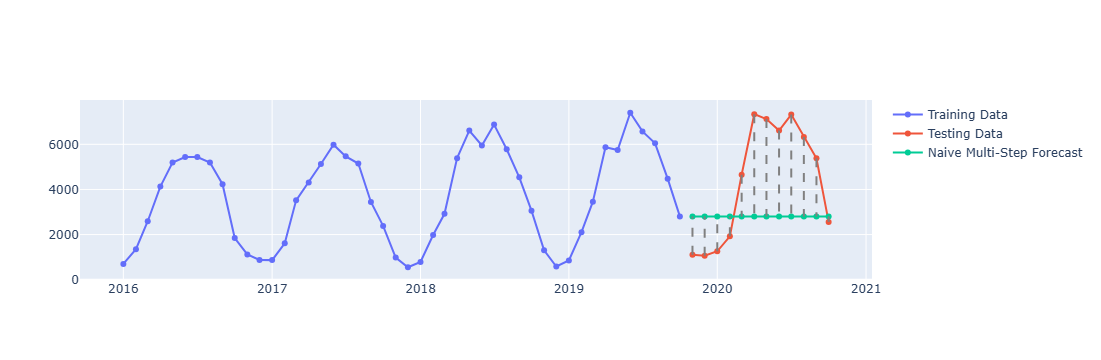

In [147]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=train_data.index, y=train_data, mode='lines+markers', name='Training Data'))
fig.add_trace(go.Scatter(x=test_data.index, y=test_data, mode='lines+markers', name='Testing Data'))
fig.add_trace(go.Scatter(x=test_data.index, y=naive_multistept_forecast, mode='lines+markers', name='Naive Multi-Step Forecast'))
for i in range(len(test_data)):
    fig.add_shape(type='line',
                  x0=test_data.index[i], y0=test_data[i],
                  x1=test_data.index[i], y1=naive_multistept_forecast[i],
                  line=dict(color='gray', dash='dash'))
fig.show()

In [148]:
mse = round(mean_squared_error(test_data, naive_multistept_forecast),1)
mae = round(mean_absolute_error(test_data, naive_multistept_forecast),1)
print('Test MSE: ', mse, "Test MAE: ", mae)

Test MSE:  8793378.3 Test MAE:  2601.3
